# IS709 Recitation 3
## Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

In [2]:
data=pd.read_csv("recitation3_data.csv")
data.head()

,x1,x2,x3,x4,x5,x6,x7
0,4.280346,-5.218291,-8.503885,6.250665,-3.515904,0.097625,-2.640278
1,2.944102,-6.678885,-7.427910,6.826092,-3.449235,-0.459187,-2.322129
2,-0.947811,2.114367,-1.351797,-6.668931,6.308409,5.789938,-1.520452
3,1.554033,7.683125,6.276012,-5.738277,-0.786493,-4.436789,6.076729
4,-1.487730,1.547614,-1.466903,-6.728469,7.391706,7.025317,-2.524432


For performing the clustering task, if there are any missing values in the data set, they must be removed or estimated. Please look at the below output; there is no missing value in the data set.

In [3]:
for columns in data:
    print(columns,"--> # of missing value", data[columns].isna().sum() )

x1 --> # of missing value 0
x2 --> # of missing value 0
x3 --> # of missing value 0
x4 --> # of missing value 0
x5 --> # of missing value 0
x6 --> # of missing value 0
x7 --> # of missing value 0


Kmeans use distance-based measurements to determine the similarity between data points. Therefore, it is recommended to standardize the data to have a mean of 0 and a standard deviation of 1.

In [4]:
standardscaler= StandardScaler()
scaled_data=standardscaler.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data, columns=data.columns)
scaled_data.head()

,x1,x2,x3,x4,x5,x6,x7
0,1.978494,-1.515667,-1.790684,1.499022,-0.509731,-0.400821,-0.449555
1,1.175860,-1.788914,-1.579323,1.601432,-0.494957,-0.556161,-0.366641
2,-1.161874,-0.143877,-0.385748,-0.800322,1.667401,1.187229,-0.157714
3,0.340894,0.897922,1.112637,-0.634691,0.095124,-1.665838,1.822207
4,-1.486185,-0.249905,-0.408359,-0.810918,1.907467,1.531876,-0.419364


Since the dataset has 7 features, the visualization in 2D is impossible. Therefore observations are represented by points in the plot by using principal components (if ncol(data) > 2)

In [5]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(pca_data, columns=["pc1","pc2","pc3","pc4","pc5","pc6","pc7"])
print("pca.explained variance ratio:\n", pca.explained_variance_ratio_)
pca_data.head()

pca.explained variance ratio:
 [0.46267908 0.3629257  0.11952892 0.0364921  0.00890255 0.00510048
 0.00437116]


,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,3.172686,-0.980431,-0.187243,1.070076,-0.151502,0.237645,-0.033909
1,2.960966,-1.138369,-0.365285,0.308519,-0.160506,-0.106620,0.038444
2,-1.790415,-1.515920,-0.915508,0.155343,0.040248,0.069299,-0.047701
3,-0.363163,2.690326,-1.015112,-0.233564,-0.371273,-0.183743,-0.203510
4,-2.103274,-2.014845,-0.868947,0.098146,0.065515,-0.025041,-0.059198


Since our dataset 10 features the visualization in 2D is impossible. Therefore observations are represented by points in the plot, using principal components if ncol(data) > 2

## The simple visualization of the clustered data

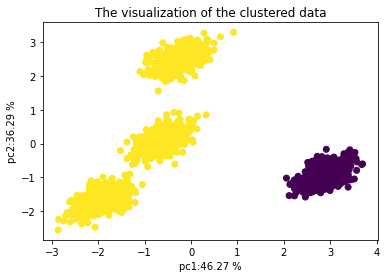

In [6]:
kmeans = KMeans(n_clusters=2, random_state=23)
df=pca_data[["pc1","pc2"]].copy()
df["clusters"]=kmeans.fit_predict(scaled_data)
plt.scatter(df["pc1"], df["pc2"],c=df.clusters)
plt.title("The visualization of the clustered data")
plt.xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
plt.ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
plt.show()

In [7]:
df.head()

,pc1,pc2,clusters
0,3.172686,-0.980431,0
1,2.960966,-1.138369,0
2,-1.790415,-1.515920,1
3,-0.363163,2.690326,1
4,-2.103274,-2.014845,1


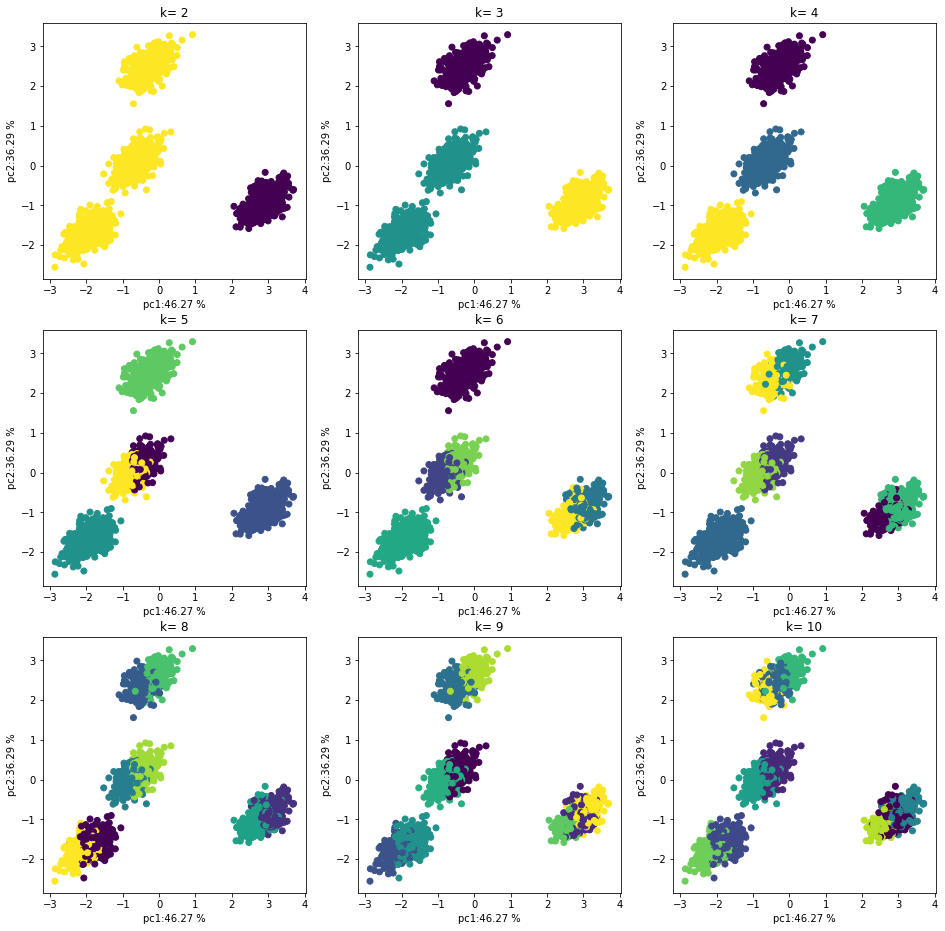

In [8]:
rows=3
columns=3
f, axes = plt.subplots(rows,columns, figsize=(16, 16))
count=2
for i in range(rows):
    for j in range(columns):
        kmeans = KMeans(n_clusters=count, random_state=23)
        df=pca_data[["pc1","pc2"]].copy()
        df["clusters"]=kmeans.fit_predict(scaled_data)
        axes[i,j].scatter(df["pc1"], df["pc2"],c=df.clusters)      
        axes[i,j].set_title( "k= " +str(count) )
        axes[i,j].set_xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
        axes[i,j].set_ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
        count=count+1    

## <span style="background-color:#A2CBE4">Within Sum of Squares(WSS) - Elbow Method For Optimal k </span>
The total within-cluster sum of squares (WSS) measures the compactness of the clustering and we want it to be as small as possible. The optimal number of clusters can be determined by looking at where the elbow/bend in the knee occurs. According to this, by looking at the within-cluster sum of square (WSS), it can be said that the optimal number of clusters is 4 because the bend in the knee occurs there. Please see https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

C:\Users\Ece\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  f"KMeans is known to have a memory leak on Windows "


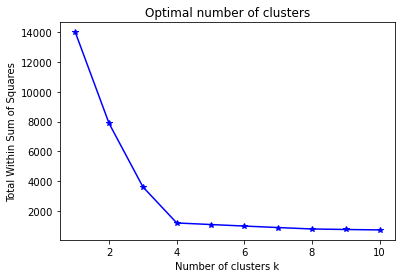

In [9]:
wss = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=23)
    kmeans = kmeans.fit(scaled_data)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
# plt.axis([0, 11, 0, 10000])
plt.show()

## inertia_: Sum of squared distances of samples to their closest cluster center.

## <span style="background-color:#A2CBE4"> Average Silhouette Approach </span>      
The average silhouette approach measures the quality of a clustering. It determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering. The average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximizes the average silhouette over a range of possible values for k. According to this, by looking at the silhouete graph, it can be said that the optimal number of k is 4.

n_clusters = 2 The average silhouette_score is : 0.4883
n_clusters = 3 The average silhouette_score is : 0.6023
n_clusters = 4 The average silhouette_score is : 0.7039
n_clusters = 5 The average silhouette_score is : 0.5962
n_clusters = 6 The average silhouette_score is : 0.4773
n_clusters = 7 The average silhouette_score is : 0.3748
n_clusters = 8 The average silhouette_score is : 0.2691
n_clusters = 9 The average silhouette_score is : 0.2519
n_clusters = 10 The average silhouette_score is : 0.2316


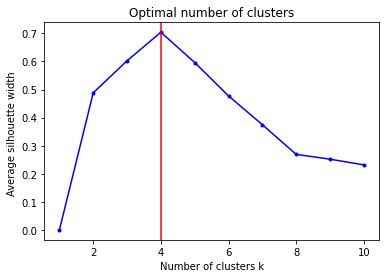

In [10]:
sil_avg = [0]
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=23)
    cluster_labels=kmeans.fit_predict(scaled_data) ###same with>> cluster_labels=kmeans.labels_
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    sil_avg.append(silhouette_avg)
    print("n_clusters =", k, "The average silhouette_score is : %.4f" % silhouette_avg)


plt.plot(range(1,len(sil_avg)+1), sil_avg, "b.-")
plt.xlabel("Number of clusters k")
plt.ylabel("Average silhouette width ")
plt.title("Optimal number of clusters")
plt.axvline( color='r', x=sil_avg.index(max(sil_avg))+1 )
plt.show()    


**Please see https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py**

For k = 2 The average silhouette_score is : 0.4882947492956353
For k = 3 The average silhouette_score is : 0.6022898180261744
For k = 4 The average silhouette_score is : 0.7039307016136136
For k = 5 The average silhouette_score is : 0.5961638351233322
For k = 6 The average silhouette_score is : 0.47730531842587187
For k = 7 The average silhouette_score is : 0.37482097460268127
For k = 8 The average silhouette_score is : 0.2690598582595334
For k = 9 The average silhouette_score is : 0.2519342274027648
For k = 10 The average silhouette_score is : 0.23159520662235583


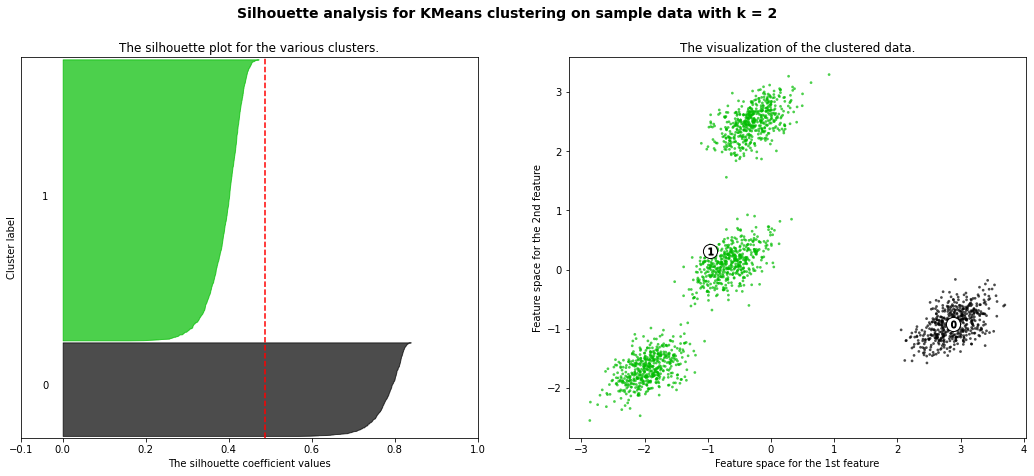

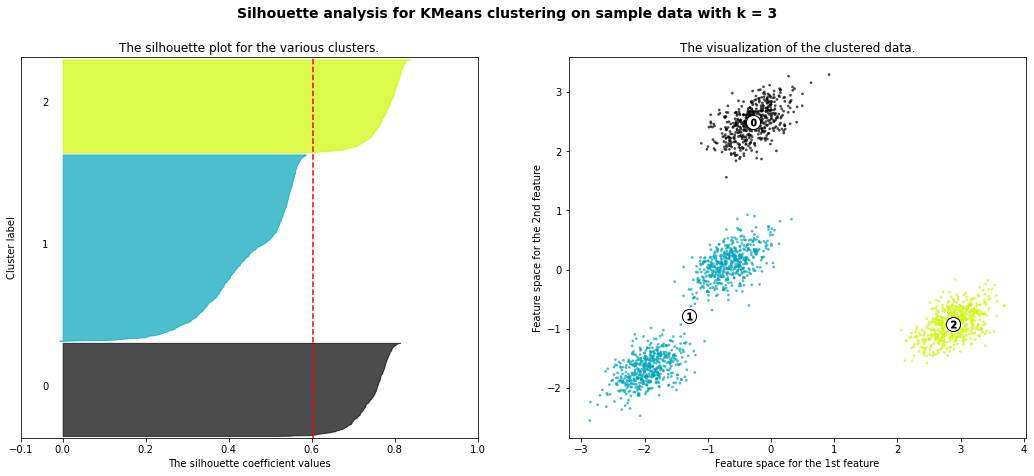

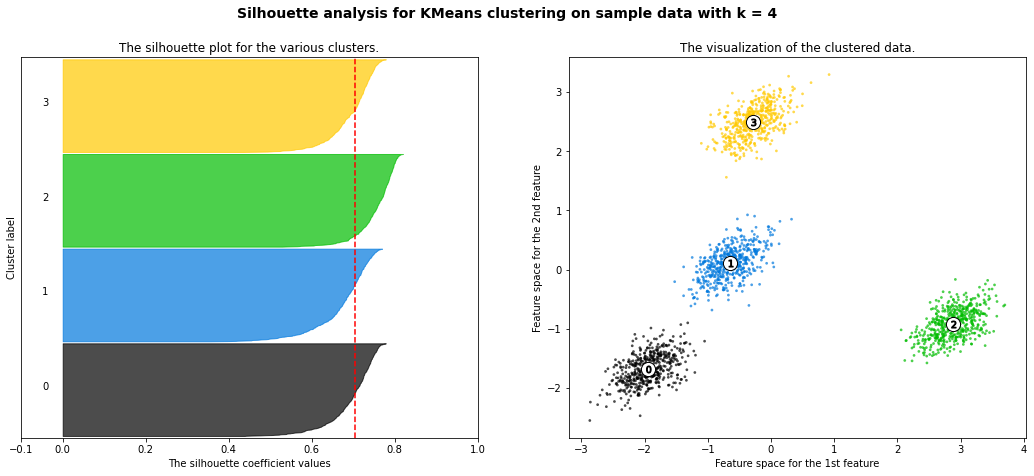

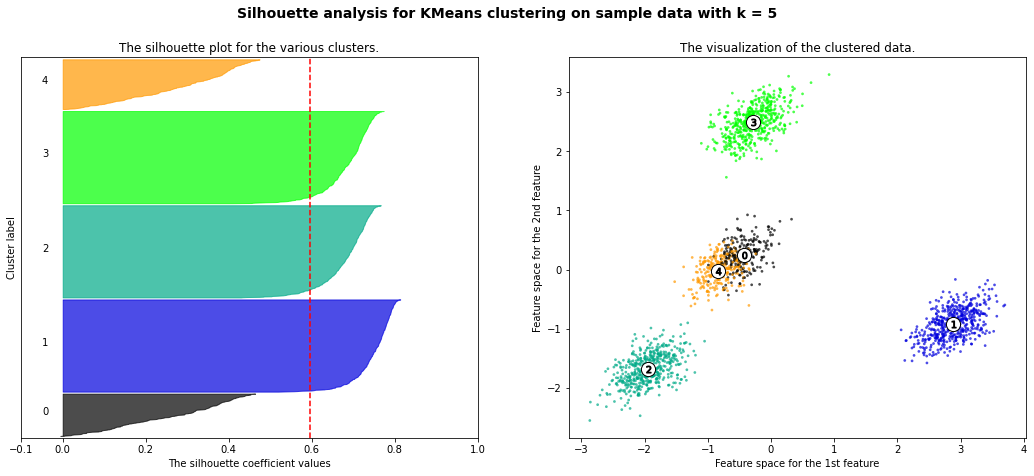

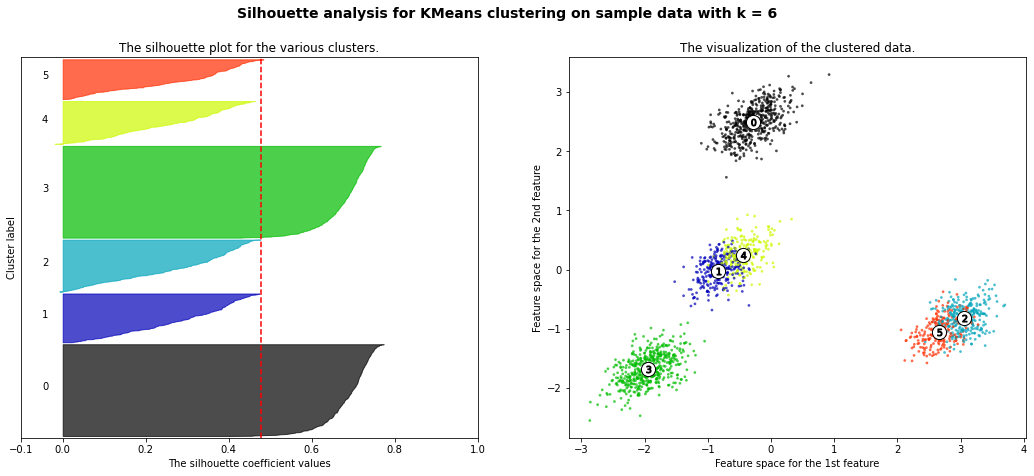

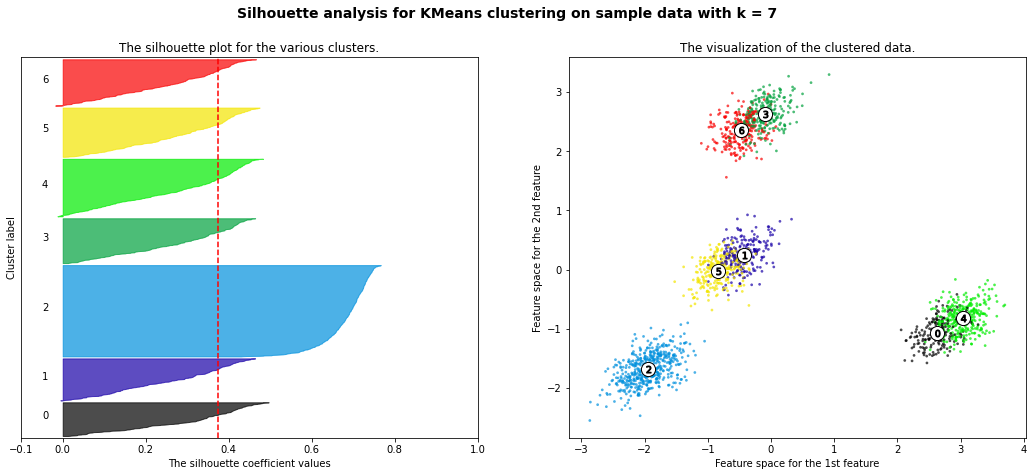

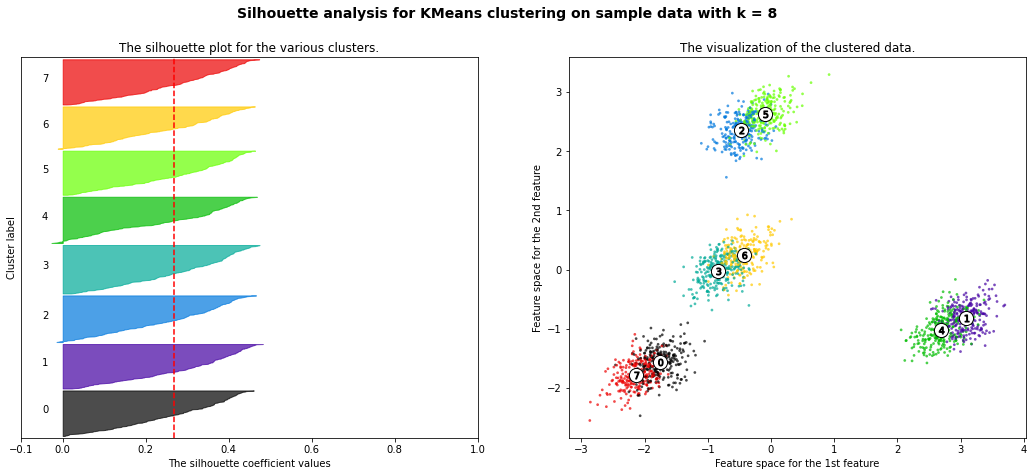

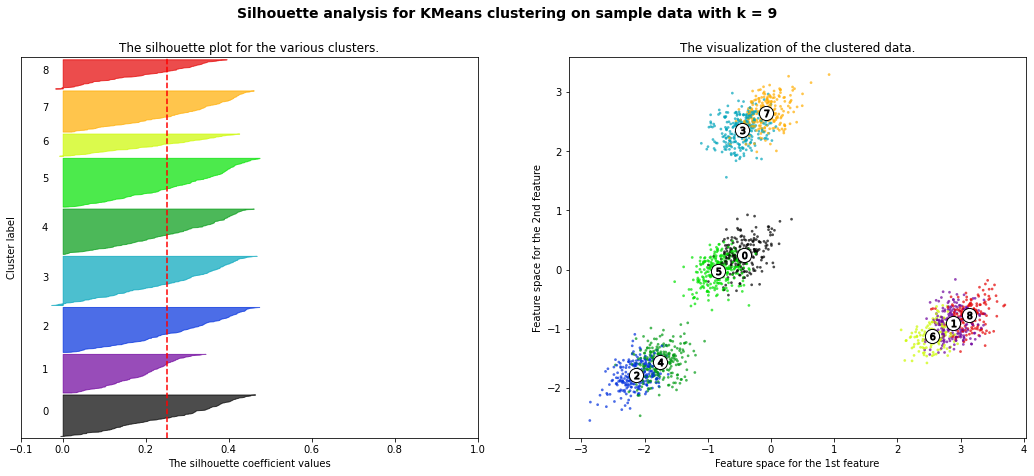

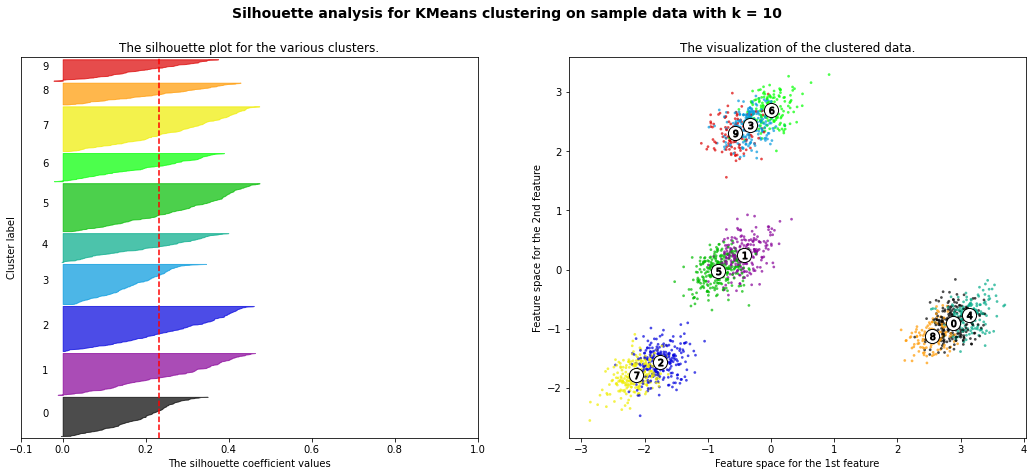

In [11]:
for k in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_data) + (k + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=k, random_state=23)
    cluster_labels = clusterer.fit_predict(scaled_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    print("For k =", k, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_data, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    df=pca_data[["pc1","pc2"]].copy()
    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    ax2.scatter(df["pc1"], df["pc2"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters - take the first two principal components
    centers = pca.transform(clusterer.cluster_centers_)
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with k = %d" % k),
                 fontsize=14, fontweight='bold')

plt.show()

In [12]:
centers.shape

(10, 7)